In [1]:
import sys,array
import matplotlib.pyplot as plt
from ROOT import TFile, TCanvas
import root_numpy as rn
import numpy as np
import math

%matplotlib inline

In [2]:
#f_root = TFile("hist_pandoraNu_pandoraNu_v1.root");
#f_root = TFile("BNBCosmicMC_pandoraNu_pandoraNu.root");
f_root = TFile("TightMult1hist_pandoraNu_pandoraNu.root");

h1 = f_root.Get("h_mom_before") 
h2 = f_root.Get("h_mom_after")
h3 = f_root.Get("h_mom_eff") 

#print h1
mom_b, edges = rn.hist2array(h1,return_edges=True)
mom_a = rn.hist2array(h2)
mom_eff = rn.hist2array(h3)

bins = (edges[0][:-1] + edges[0][1:])/2
err_effx = 0.5 * (bins[1] - bins[0])
err_effy = [ mom_eff[i] * math.sqrt(1./mom_a[i] + 1./mom_b[i]) for i in xrange(len(bins))]

err_mom_ay = [ math.sqrt(mom_a[i]) for i in xrange(len(bins))]
err_mom_by = [ math.sqrt(mom_b[i]) for i in xrange(len(bins))]

In [3]:
h_thetab = f_root.Get("h_theta_before") 
h_thetaa = f_root.Get("h_theta_after")
h_thetae = f_root.Get("h_theta_eff") 

#print h1
theta_b, edges = rn.hist2array(h_thetab,return_edges=True)
theta_a = rn.hist2array(h_thetaa)
theta_e = rn.hist2array(h_thetae)

bins_theta = (edges[0][:-1] + edges[0][1:])/2
err_thetax = 0.5 * (bins_theta[1] - bins_theta[0])
err_thetay = [ theta_e[i] * math.sqrt(1./theta_a[i] + 1./theta_b[i]) for i in xrange(len(bins_theta))]

err_theta_ay = [ math.sqrt(theta_a[i]) for i in xrange(len(bins_theta))]
err_theta_by = [ math.sqrt(theta_b[i]) for i in xrange(len(bins_theta))]

In [4]:
h_phib = f_root.Get("h_phi_before") 
h_phia = f_root.Get("h_phi_after")
h_phie = f_root.Get("h_phi_eff") 

#print h1
phi_b, edges = rn.hist2array(h_phib,return_edges=True)
phi_a = rn.hist2array(h_phia)
phi_e = rn.hist2array(h_phie)

phi_e = [float(phi_a[i])/phi_b[i] for i in xrange(len(phi_a))]

bins_phi = (edges[0][:-1] + edges[0][1:])/2
err_phix = 0.5 * (bins_phi[1] - bins_phi[0])
err_phiy = [ phi_e[i] * math.sqrt(1./phi_a[i] + 1./phi_b[i]) for i in xrange(len(bins_phi))]

err_phi_ay = [ math.sqrt(phi_a[i]) for i in xrange(len(bins_phi))]
err_phi_by = [ math.sqrt(phi_b[i]) for i in xrange(len(bins_phi))]

In [5]:
print phi_e

[0.36353944562899787, 0.33860759493670883, 0.3507148864592094, 0.31551270815074495, 0.23858341099720409, 0.21760633036597429, 0.28308823529411764, 0.32561983471074379, 0.34848484848484851, 0.36873406966864913, 0.36979166666666669, 0.33659491193737767, 0.32765298218435324, 0.307753164556962, 0.24087591240875914, 0.24694376528117359, 0.31254639940608758, 0.35999999999999999, 0.33605720122574056, 0.35995955510616784]


In [6]:
h_Eb = f_root.Get("h_E_before") 
h_Ea = f_root.Get("h_E_after")
h_Ee = f_root.Get("h_E_eff") 

#print h1
E_b, edges = rn.hist2array(h_Eb,return_edges=True)
E_a = rn.hist2array(h_Ea)
E_e = rn.hist2array(h_Ee)

bins_E = (edges[0][:-1] + edges[0][1:])/2
err_Ex = 0.5 * (bins_E[1] - bins_E[0])
err_Ey = [ E_e[i] * math.sqrt(1./E_a[i] + 1./E_b[i]) if E_e[i]!=0 else 0 for i in xrange(len(bins_E))]
#err_Ey = [ E_e[i] * math.sqrt(1./E_a[i] + 1./E_b[i]) ]

err_E_ay = [ math.sqrt(E_a[i]) for i in xrange(len(bins_E))]
err_E_by = [ math.sqrt(E_b[i]) for i in xrange(len(bins_E))]

#print E_e

In [12]:
h_Enueb = f_root.Get("h_Enue_before") 
h_Enuea = f_root.Get("h_Enue_after")
h_Enuee = f_root.Get("h_Enue_eff") 

#print h1
Enue_b, edges = rn.hist2array(h_Enueb,return_edges=True)
Enue_a = rn.hist2array(h_Enuea)
#Enue_e = rn.hist2array(h_Enuee)

Enue_e = [Enue_a[i]/Enue_b[i] if Enue_b[i] != 0 else 0 \
          for i in xrange(len(Enue_b)) ]

bins_Enue = (edges[0][:-1] + edges[0][1:])/2

err_Enue_ay = [ math.sqrt(Enue_a[i]) for i in xrange(len(bins_Enue))]
err_Enue_by = [ math.sqrt(Enue_b[i]) for i in xrange(len(bins_Enue))]

err_Enuex = 0.5 * (bins_Enue[1] - bins_Enue[0])
err_Enuey = [ Enue_e[i] * math.sqrt(1./Enue_a[i] + 1./Enue_b[i]) \
             if Enue_e[i]!=0 else 0 for i in xrange(len(bins_Enue))]

In [13]:
#print err_Enuey[-7], Enue_b[-7], Enue_a[-7], Enue_e[-7]
print "E  : ", Enue_e[4:]
print "A  : ", Enue_a[4:]
print "B  : ", Enue_b[4:]

print np.cumsum(mom_a)[-1] , " true events after selectionII cut"

E  :  [0.22222222222222221, 0.125, 0.125, 0.1875, 0.055555555555555552, 0.14285714285714285, 0.1111111111111111, 0.0, 0.21428571428571427, 0.33333333333333331, 0.0, 0.2857142857142857, 0.1111111111111111, 0.0, 0.25, 0.0]
A  :  [ 2.  1.  1.  3.  1.  2.  1.  0.  3.  2.  0.  2.  1.  0.  2.  0.]
B  :  [  9.   8.   8.  16.  18.  14.   9.   8.  14.   6.   9.   7.   9.   5.   8.
   1.]
7148.0  true events after selectionII cut


In [14]:
#eff = [E_a[i]/E_b[i] if E_b[i] != 0 else 0 for i in xrange(len(E_b)) ]
#print eff

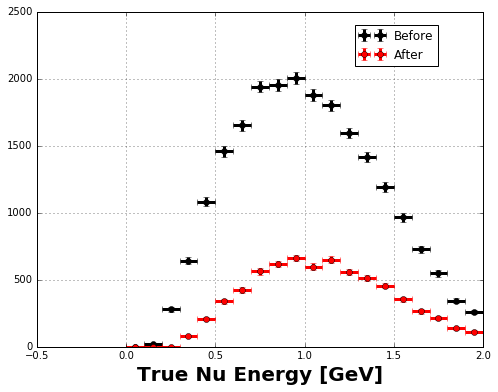

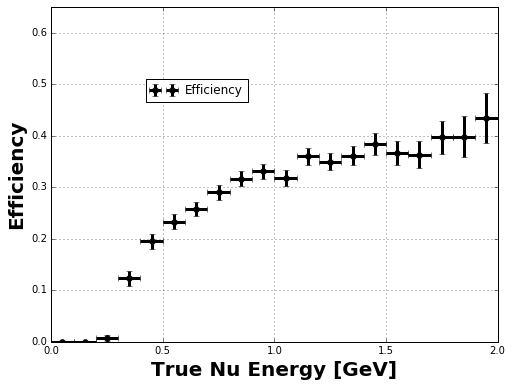

In [20]:
plt.figure(figsize=(8,6))
#plt.plot(bins_E,E_b,'k-',label='Before',lw=1,marker='o')
#plt.plot(bins_E,E_a,'r-',label='After',lw=1,marker='o')
plt.errorbar(bins_E,E_b,yerr=err_E_by,xerr=err_Ex,fmt='o',color='k',lw=3,label='Before')
plt.errorbar(bins_E,E_a,yerr=err_E_ay,xerr=err_Ex,fmt='o',color='r',lw=3,label='After')
plt.grid(True)
plt.xlabel('True Nu Energy [GeV]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.7,0.9))
plt.savefig('EffPlots/NuEnergy.png')

plt.figure(figsize=(8,6))
#plt.plot(bins_E,E_e,'k-',label='Efficiency',lw=1,marker='o')
plt.errorbar(bins_E,E_e,yerr=err_Ey,xerr=err_Ex,fmt='o',color='k',lw=3,label='Efficiency')
plt.grid(True)
plt.xlabel('True Nu Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.2,0.75))
plt.ylim(0,0.65)
plt.xlim(0.,2.)
plt.savefig('EffPlots/NuEnergyEff.png')

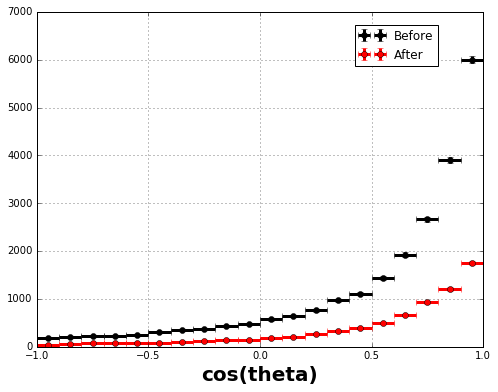

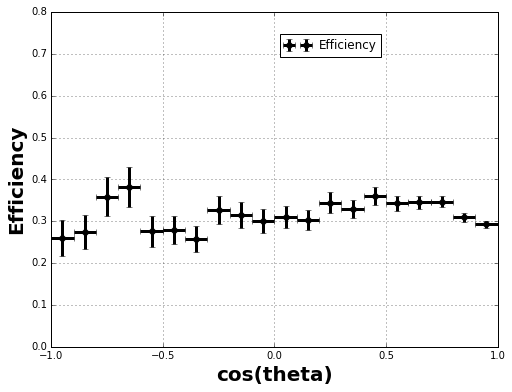

In [16]:
plt.figure(figsize=(8,6))
#plt.plot(bins_theta,theta_b,'k-',label='Before',lw=1,marker='o')
#plt.plot(bins_theta,theta_a,'r-',label='After',lw=1,marker='o')
plt.errorbar(bins_theta,theta_b,yerr=err_theta_by,xerr=err_thetax,fmt='o',color='k',lw=3,label='Before')
plt.errorbar(bins_theta,theta_a,yerr=err_theta_ay,xerr=err_thetax,fmt='o',color='r',lw=3,label='After')
plt.grid(True)
plt.xlabel('cos(theta)',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.7,0.9))
#plt.ylim(-0.1,4.)
plt.savefig('EffPlots/CosTheta.png')

plt.figure(figsize=(8,6))
#plt.plot(bins_theta,theta_e,'k-',label='Efficiency',lw=1,marker='o')
plt.errorbar(bins_theta,theta_e,yerr=err_thetay,xerr=err_thetax,fmt='o',color='k',lw=3,label='Efficiency')
plt.grid(True)
plt.ylim(0,1)
plt.xlabel('cos(theta)',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.5,0.9))
plt.ylim(0.0,0.8)

plt.savefig('EffPlots/CosThetaEff.png')

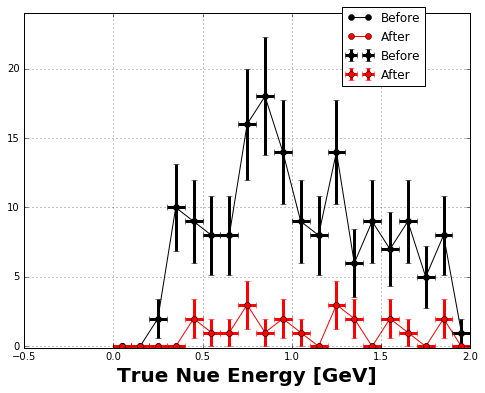

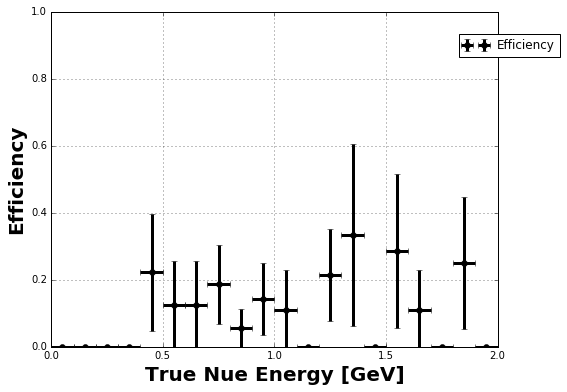

In [22]:
plt.figure(figsize=(8,6))
plt.plot(bins_Enue,Enue_b,'k-',label='Before',lw=1,marker='o')
plt.plot(bins_Enue,Enue_a,'r-',label='After',lw=1,marker='o')
plt.errorbar(bins_Enue,Enue_b,yerr=err_Enue_by,xerr=err_Enuex,fmt='o',color='k',lw=3,label='Before')
plt.errorbar(bins_Enue,Enue_a,yerr=err_Enue_ay,xerr=err_Enuex,fmt='o',color='r',lw=3,label='After')
plt.grid(True)
plt.xlabel('True Nue Energy [GeV]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.7,0.9))
plt.ylim(-0.1,24.)
plt.savefig('EffPlots/NueE.png')

plt.figure(figsize=(8,6))
plt.errorbar(bins_Enue,Enue_e,yerr=err_Enuey,xerr=err_Enuex,fmt='o',color='k',lw=3,label='Efficiency')
plt.grid(True)
plt.xlabel('True Nue Energy [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.9,0.9))
plt.ylim(0,1)
plt.xlim(0.,2.)
plt.savefig('EffPlots/NueEEff.png')


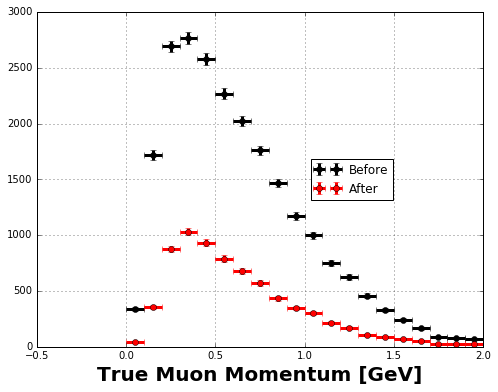

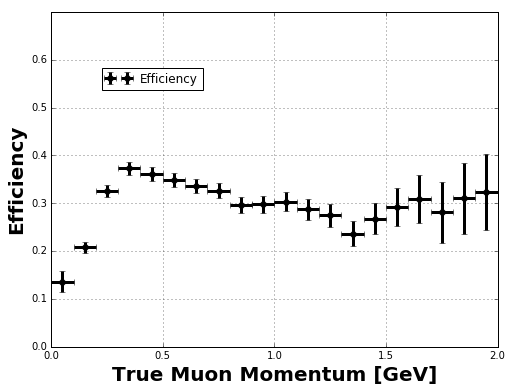

In [23]:
plt.figure(figsize=(8,6))
#plt.plot(bins,mom_b,'k-',label='Before',lw=1,marker='o')
#plt.plot(bins,mom_a,'r-',label='After',lw=1,marker='o')
plt.errorbar(bins,mom_b,yerr=err_mom_by,xerr=err_Enuex,fmt='o',color='k',lw=3,label='Before')
plt.errorbar(bins,mom_a,yerr=err_mom_ay,xerr=err_Enuex,fmt='o',color='r',lw=3,label='After')
#ax0.hist(mom_b,bins, histtype='step',color='k') #, rwidth=0.8)
plt.grid(True)
#plt.ylim(0,10)
plt.xlabel('True Muon Momentum [GeV]',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.6,0.5))
plt.savefig('EffPlots/MuMom.png')

plt.figure(figsize=(8,6))
#plt.plot(bins,mom_eff,'k-',label='Efficiency',lw=1,marker='o')
plt.errorbar(bins,mom_eff,yerr=err_effy,xerr=err_effx,fmt='o',color='k',lw=3,label='Efficiency')
plt.grid(True)
plt.ylim(0,0.55)
plt.xlabel('True Muon Momentum [GeV]',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.1,0.8))
plt.ylim(0,0.7)
plt.xlim(0.,2.)
plt.savefig('EffPlots/MuMomEff.png')


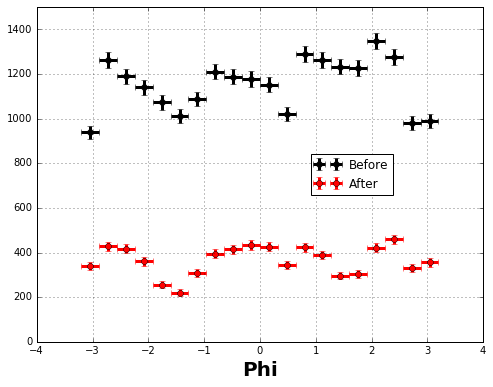

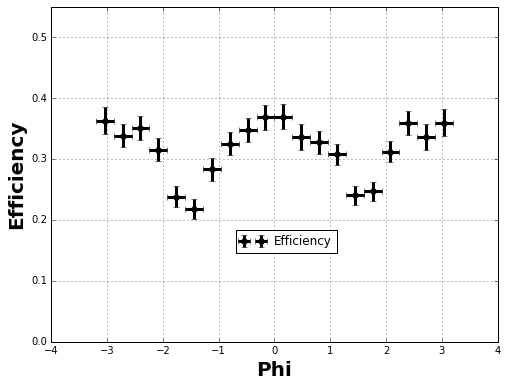

In [19]:
plt.figure(figsize=(8,6))
#plt.plot(bins_phi,phi_b,'k-',label='Before',lw=1,marker='o')
#plt.plot(bins_phi,phi_a,'r-',label='After',lw=1,marker='o')
plt.errorbar(bins_phi,phi_b,yerr=err_phi_by,xerr=err_phix,fmt='o',color='k',lw=3,label='Before')
plt.errorbar(bins_phi,phi_a,yerr=err_phi_ay,xerr=err_phix,fmt='o',color='r',lw=3,label='After')
#ax0.hist(mom_b,bins, histtype='step',color='k') #, rwidth=0.8)
plt.grid(True)
#plt.ylim(0,10)
plt.xlabel('Phi',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.6,0.5))
plt.savefig('EffPlots/Phi.png')
plt.ylim(0,1500)

plt.figure(figsize=(8,6))
#plt.plot(bins,mom_eff,'k-',label='Efficiency',lw=1,marker='o')
plt.errorbar(bins_phi,phi_e,yerr=err_phiy,xerr=err_phix,fmt='o',color='k',lw=3,label='Efficiency')
plt.grid(True)
plt.ylim(0,0.55)
plt.xlabel('Phi',fontsize=20,weight='bold')
plt.ylabel('Efficiency',fontsize=20,weight='bold')
plt.legend(loc='center left', bbox_to_anchor=(.4,0.3))
#plt.ylim(0,0.7)
plt.savefig('EffPlots/PhiEff.png')
